<a href="https://colab.research.google.com/github/SikiruKilaniOlanrewaju/Potato-Leaf-Prediction/blob/main/LEKAN_POTATO_BLIGHT_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: MOUNT DRIVE

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow keras matplotlib numpy scikit-learn

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the main dataset directory
dataset_dir = 'drive/MyDrive/POTATO'

# Image dimensions and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Create ImageDataGenerators with data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% of data for validation
)

# Define train and validation data generators
train_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Set as training data
)

val_data = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

# Optional: Set up a test generator if you have a separate test folder
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_data = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Alternatively, create a separate test folder
)


Found 1746 images belonging to 3 classes.
Found 436 images belonging to 3 classes.
Found 0 images belonging to 3 classes.


In [ ]:
# New paths after splitting data
train_dir = 'drive/MyDrive/POTATO/train'
val_dir = 'drive/MyDrive/POTATO/validation'
test_dir = 'drive/MyDrive/POTATO/test'

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_data = train_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load test data without subset
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 192 images belonging to 3 classes.
Found 499 images belonging to 3 classes.
Found 741 images belonging to 3 classes.


Found 1432 images belonging to 3 classes.


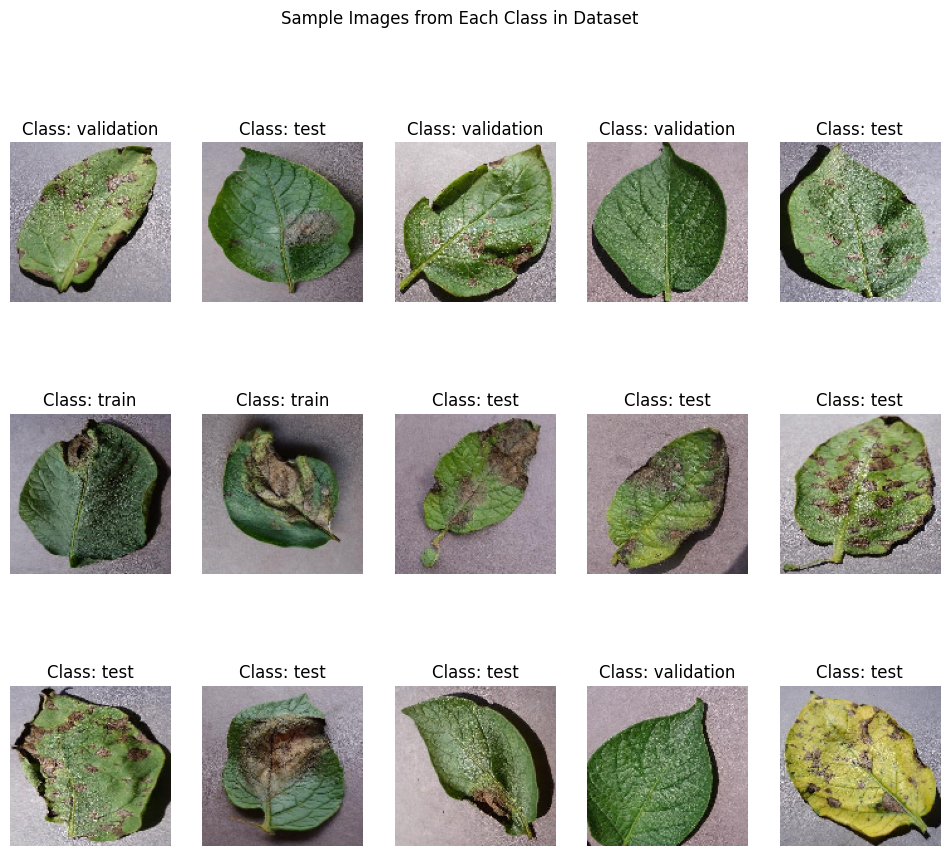

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define dataset directory
dataset_dir = 'drive/MyDrive/POTATO'

# Define ImageDataGenerator without data augmentation, just for visualization
preview_datagen = ImageDataGenerator(rescale=1.0/255)

# Load images in a random order with a small batch size for quick viewing
preview_data = preview_datagen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),  # Adjust as needed
    batch_size=15,           # Small batch size for viewing
    class_mode='categorical'
)

# Retrieve a batch of images and labels
images, labels = next(preview_data)

# Display the images with their class labels
plt.figure(figsize=(12, 10))
for i in range(len(images)):
    plt.subplot(3, 5, i + 1)
    plt.imshow(images[i])
    plt.axis('off')
    class_name = list(preview_data.class_indices.keys())[np.argmax(labels[i])]
    plt.title(f"Class: {class_name}")
plt.suptitle("Sample Images from Each Class in Dataset")
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes: healthy, earlyblight, lateblight
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,027 (12.61 MB)

 Trainable params: 3,305,027 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    epochs=20,  # Adjust based on your needs
    validation_data=val_data
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6725 - loss: 0.8465

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 117s 22s/step - accuracy: 0.6880 - loss: 0.8281 - val_accuracy: 0.1884 - val_loss: 3.9745
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.8487 - loss: 0.4932 - val_accuracy: 0.1884 - val_loss: 5.8856
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8655 - loss: 0.4727 - val_accuracy: 0.1884 - val_loss: 5.1465
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8576 - loss: 0.4476 - val_accuracy: 0.1884 - val_loss: 5.1503
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.8807 - loss: 0.3677 - val_accuracy: 0.1884 - val_loss: 3.6255
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.8592 - loss: 0.4066 - val_accuracy: 0.1884 - val_loss: 5.1667
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.8687 - loss: 0.3516 - val_accuracy: 0.1884 - val_loss: 6.2480
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - accuracy: 0.8677 - loss: 0.3098 - val_accuracy: 0.1884 - val_loss: 10.9696
Epoch 9/20
6/6 ━

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test accuracy: {test_accuracy:.2f}")


 1/24 ━━━━━━━━━━━━━━━━━━━━ 11s 504ms/step - accuracy: 0.0000e+00 - loss: 22.1986

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 127s 5s/step - accuracy: 0.1879 - loss: 21.5553
Test accuracy: 0.46


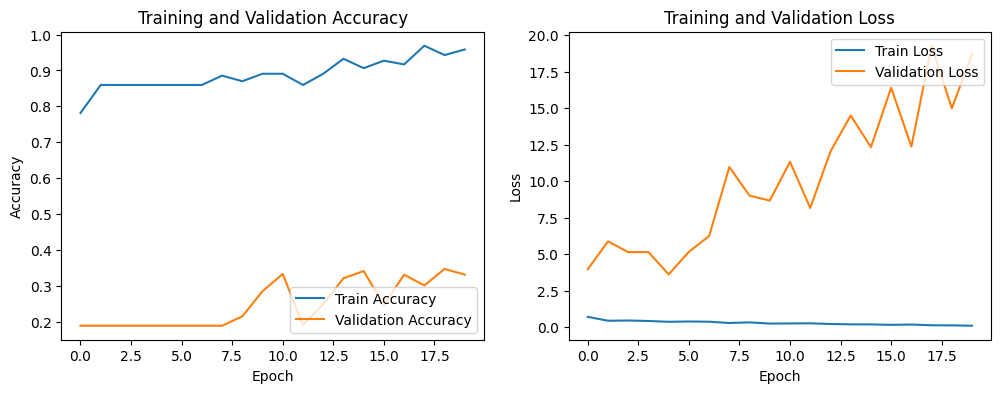

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Define the DNN model
dnn_model = Sequential([
    Flatten(input_shape=(128, 128, 3)),  # Flatten the input images
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the DNN model
dnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
dnn_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      25,166,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,298,435 (96.51 MB)

 Trainable params: 25,298,435 (96.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the DNN model
dnn_history = dnn_model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6362 - loss: 12.6972 - val_accuracy: 0.1884 - val_loss: 134.2326
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6787 - loss: 22.2318 - val_accuracy: 0.1884 - val_loss: 188.9904
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.7551 - loss: 18.7082 - val_accuracy: 0.1884 - val_loss: 150.0804
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.8124 - loss: 11.8024 - val_accuracy: 0.1884 - val_loss: 113.4661
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6731 - loss: 15.4803 - val_accuracy: 0.1884 - val_loss: 88.6180
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.7437 - loss: 14.5662 - val_accuracy: 0.1884 - val_loss: 73.8559
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.7525 - loss: 12.1415 - val_accuracy: 0.1884 - val_loss: 55.9894
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7379 - loss: 9.0235 - val_accuracy: 0.1884 - val_los

In [ ]:
# Evaluate the DNN model on test data
dnn_test_loss, dnn_test_accuracy = dnn_model.evaluate(test_data)
print(f"DNN Test accuracy: {dnn_test_accuracy:.2f}")

24/24 ━━━━━━━━━━━━━━━━━━━━ 12s 528ms/step - accuracy: 0.1595 - loss: 2.9440
DNN Test accuracy: 0.46


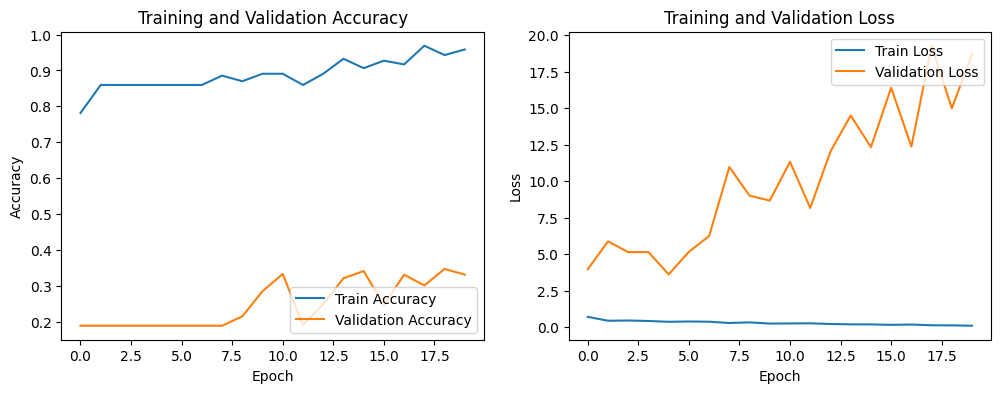

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()